# Проект 2. Разведывательный анализ данных 

## цели и задачи проекта:

Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Определиться с параметрами будущей модели, провести разведывательный анализ данных и составить отчёт по его результатам. 


school — аббревиатура школы, в которой учится ученик

sex — пол ученика ('F' - женский, 'M' - мужской)

age — возраст ученика (от 15 до 22)

address — тип адреса ученика ('U' - городской, 'R' - за городом)

famsize — размер семьи('LE3' <= 3, 'GT3' >3)

Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

schoolsup — дополнительная образовательная поддержка (yes или no)

famsup — семейная образовательная поддержка (yes или no)

paid — дополнительные платные занятия по математике (yes или no)

activities — дополнительные внеучебные занятия (yes или no)

nursery — посещал детский сад (yes или no)

higher — хочет получить высшее образование (yes или no)

internet — наличие интернета дома (yes или no)

romantic — в романтических отношениях (yes или no)

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

absences — количество пропущенных занятий

score — баллы по госэкзамену по математике


In [1]:
# Начнем с азов: импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

# Функции

In [2]:
# плотность распределения переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [3]:
# статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [4]:
# распределение признака числовых переменных и количество пустых строк
def get_charts_col(column):
    stud_math[column].hist()
    display(stud_math[column].describe())
    print('Количество заполненных значений - ' + str(stud_math[column].count()) +
          ' из 395')

In [5]:
# формул интерквартильного расстояния для фильтра выбросов
def get_emission_filter(column, a=0, b=10):
    median = stud_math[column].median()
    IQR = stud_math[column].quantile(0.75) - stud_math[column].quantile(0.25)
    perc25 = stud_math[column].quantile(0.25)
    perc75 = stud_math[column].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    stud_math[column].loc[stud_math[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(a, b),
                                                                                              label='IQR')
    plt.legend()

## Предподготовка

In [6]:
# Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Сопоставляя описание и название столбцов, видим, что у нас в таблице присутствует лишний столбец "studytime, granular". Эти данные не несут нам никакой информации, поэтому удалим этот столбец. А также переведем названия столбцов в нижний регистр для упрощения обращения.

In [7]:
stud_math.drop(['studytime, granular'], inplace=True, axis=1)
stud_math.columns = stud_math.columns.str.lower()
stud_math.head(5)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Заменим пустые значения в строковых столбцах на None

In [8]:
for column in stud_math.columns:
    if stud_math[column].dtypes == 'object':
       stud_math[column] = stud_math[column].astype(str).apply(lambda x: None if x.strip() == '' 
                                                               else None if str.lower(x) == 'nan' 
                                                               else x.strip())


In [9]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Выведем уникальные значения в столбцах и значения, встретившиеся более 10 раз. А также проверим значения, чтобы они соответствовали описанию датафрейма.

In [10]:
for column in stud_math.columns:
    display(pd.DataFrame(stud_math[column].value_counts()))
    print("Значений, встретившихся в столбце более 10 раз:",
          (stud_math[column].value_counts() > 10).sum())
    print("Уникальных значений:", stud_math[column].nunique())
    stud_math.loc[:, [column]].info()

,school
GP,349
MS,46


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,sex
F,208
M,187


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


,address
U,295
R,83


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famsize
GT3,261
LE3,107


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,pstatus
T,314
A,36


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,mjob
other,133
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,fjob
other,197
services,102
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,reason
course,137
home,104
reputation,103
other,34


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,guardian
mother,250
father,86
other,28


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,failures
0.0,293
1.0,49
2.0,16
3.0,15


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,schoolsup
no,335
yes,51


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famsup
yes,219
no,137


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,paid
no,200
yes,155


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,activities
yes,195
no,186


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,nursery
yes,300
no,79


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,higher
yes,356
no,19


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,internet
yes,305
no,56


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,romantic
no,240
yes,124


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Значений, встретившихся в столбце более 10 раз: 12
Уникальных значений: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


# Первичный осмотр данных в столбцах

Мы видим, что столбцы age, fedu, famrel, absences - имеют уникальные значения, которые похожи на выборсы. 

Проверим эти данные.


# age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Количество заполненных значений - 395 из 395


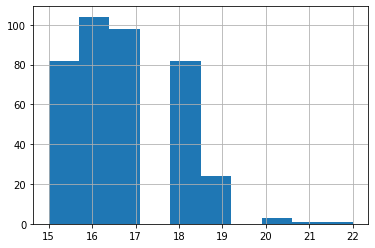

In [11]:
get_charts_col('age')

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


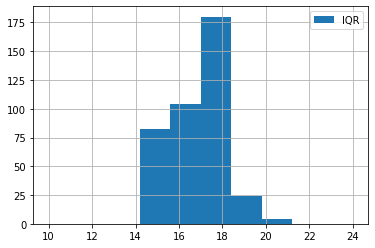

In [12]:
get_emission_filter('age',10, 24)

In [13]:
# Удалим выброс 22, это значение находится за пределами начальных условий
stud_math.drop(stud_math[stud_math['age'] > 21].index, inplace=True)

In [14]:
stud_math['age'].describe()

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

## medu

count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

Количество заполненных значений - 391 из 395


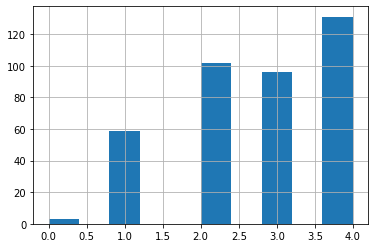

In [15]:
get_charts_col('medu')

Выбросов нет, данные в пределах начальных условий.

## fedu

count    370.000000
mean       2.618919
std        2.230163
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

Количество заполненных значений - 370 из 395


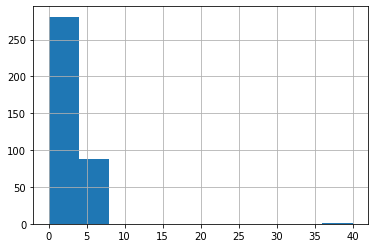

In [16]:
get_charts_col('fedu')

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


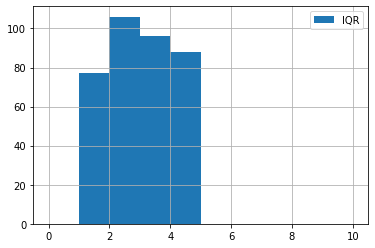

In [17]:
get_emission_filter('fedu')

Скорее всего здесь присутствует опечатка, поэтому преобразуем данные и вместо значения 40 поставим 4.

In [18]:
stud_math.loc[stud_math['fedu'] == 40.0, 'fedu'] = 4.0
stud_math.fedu.describe()

count    370.000000
mean       2.521622
std        1.087409
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

## traveltime


count    366.000000
mean       1.439891
std        0.694751
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Количество заполненных значений - 366 из 395


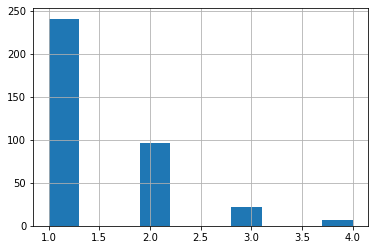

In [19]:
get_charts_col('traveltime')

Выбросов нет, данные в пределах начальных условий. Исходя из графика, большинство учащихся живет рядом со школой.

## studytime 

count    387.000000
mean       2.041344
std        0.841505
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Количество заполненных значений - 387 из 395


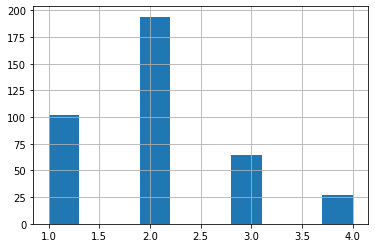

In [20]:
get_charts_col('studytime')

Выбросов нет, данные в пределах начальных условий. 

##  failures

In [ ]:
get_charts_col('failures')

Выбросов нет, данные в пределах начальных условий. Количество неудач от 1 до 3 - присутствует у меньшиства учащихся.

## famrel

In [ ]:
get_charts_col('famrel')

In [ ]:
get_emission_filter('famrel')

In [ ]:
# Здесь также как и в предыдущем примере похоже на опечатку, поменяем значение -1 на 1
stud_math.loc[stud_math['famrel'] == -1, 'famrel'] = 1
stud_math.famrel.describe()

## freetime 

In [ ]:
get_charts_col('freetime')

Выбросов нет, данные в пределах начальных условий. Большая часть учащихся имеют свободное время после школы

## goout 

In [ ]:
get_charts_col('goout')

Выбросов нет, данные в пределах начальных условий. Большая часть учащихся проводят время со своими друзьями.

## health

In [ ]:
get_charts_col('health')

Выбросов нет, данные в пределах начальных условий. Большая часть учащихся имеют хорошее состояние здоровья.

## absences

In [ ]:
get_charts_col('absences')

In [ ]:
get_emission_filter('absences')

Из уникальных значений видно, что присутствует 2 записи с большим количеством пропусков (212 и 385). Считаю, Что их нужно исключить из наших данных.

In [ ]:
# Фильтруем данные
stud_math.drop(stud_math[stud_math['absences'] >= 212].index, inplace=True)
stud_math.absences.describe()

## score

In [ ]:
get_charts_col('score')

Score скорее всего была использована стобалльная шкала оценивания, уникальные значения в пределах начальных условий. 37 учащихся имеют 0 баллов, скорее всего это те, кто не был допущен к ЕГЭ. Один учащийся набрал 100 баллов, что вполне допустимо. Поэтому выбросы рассматривать не будем.

Мы преобразовали данные в трех колонках. Таким образом у нас остались строки со значением None, причем их очень много. Алгоритма заполнения отстутствующих даных нет, соответсвенно нет возможности восстанови их. Для проведения корреляционного анализа удалим в количественных столбцах эти строки.

In [ ]:
column_quantities = ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
                     'famrel', 'freetime', 'goout', 'health', 'absences', 'score']
stud_math.dropna('index', subset=column_quantities, inplace=True)

In [ ]:
stud_math.info()

In [ ]:
stud_math1 = stud_math.dropna(how='any')
stud_math1.info()

Если удалять все строки с None, то остается совсем мало информации всего 97 строк, поэтому мы удалим None только в количественных столбцах. 

# Корреляционный анализ

Выясним, какие столбцы коррелируют с успеваемостью по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользуемся функцией pairplot из модуля seaborn:

In [ ]:
sns.pairplot(stud_math, kind='reg')

In [ ]:
# Используем для наглядности матрицу корреляций:
stud_math.corr()

In [ ]:
stud_math[column_quantities].corr()['score'].sort_values()

Скоррелированы почти полностью переменных нет. 

Положительные корреляции score наблюдаются с: medu, fedu, studytime, famrel, freetime, adsences.

Отрицательные корреляции score наблюдаются с: age, traveltime, failures, goout, health.



Исходя из этого мы можем сделать выводы:

Положительно на успеваемость по математике влияют: образование их родителей (в большей мере образование матери), дополнительно выделенное время на обучение помимо школы, хорошие отношения в семье, свободное время после школы и малое количество пропущенных занятий.

Отрицательно на успеваемость по математике влияют: возраст (чем старше, тем хуже успеваемость), время пути до школы, количество внеучебных неудач, количество проведенного времени с друзьями и текущее состояние здоровья.

Таким образом у нас получаются слабоскоррелированные с рейтингом переменные: 'age','medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences'

# Анализ номинативных переменных

Номинативные переменные, которые осталось рассмотреть: school, sex, address, famsize, pstatus, mjob, fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic.

Так как уникальных значений в столбцах немного, будем брать в рассмотрение все значения.

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме sex, address, famsize имеют слабое влияние или не имеют влияния на успеваемость. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения успеваемости по математике по параметрам неразличимы:

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Как мы видим, серьёзно отличаются два параметра: sex, address. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: sex, address, age, medu, fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences.

In [ ]:
stud_math_for_model = stud_math.loc[:, ['sex', 'address', 'age', 'medu', 'fedu',
                                        'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']]
stud_math_for_model.head()

# Выводы

Итак, в результате EDA для выявления на ранней стадии студентов, находящихся в группе риска были получены следующие выводы:

В данных допустимо количество пустых значений, только столбец pstatus был заполнен в малом количестве случаев. Выбросы найдены только в 4 столбцах, что позволяет сделать вывод о том, что данные достаточно чистые. 

Положительная корреляция параметров famrel, freetime, absences, studytime, fedu, medu может говорить о том, что высшее образование родителей дает пример для подражания детям и способствует получению хороших баллов. Также благополучно влияют хорошие семейные отношения, допольнительное обучение, отсутствие пропусков занятий и свободное время после школы. 

В зону риска могут попасть учащиеся, чьи родители имеют образование ниже высшего, а также плохие семейные отношения, много пропусков занятий и отсутствуют допольнительные занятия, плохое состояние здоровья, отсутствие свободного времени и общения с друзьями.

Важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, address, age, medu, fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences.